## Spatial Structure of Rain

Import the class object RainGage and initialize it with a file containing all of the data or with a list of years. The output from this are all contained in attributes of the ** `RainGage`** class. All of the data are contained in a **`pandas.DataFrame`** object called **`RainGage.df`**

In [1]:
from __init__ import *
from rain import *
from common import *
from event import *

%matplotlib inline
import mpld3 

** Philadelphia:**

In [ ]:
path = "./input/"
rg = Rain(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")

In [ ]:
rg.get_ll()

**St. Louis: **

In [4]:
path = './input/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()

#### Charlotte:

In [2]:
path = '../../data/CHARLOTTE/Version1/'

rg = Rain(path=path, name='Charlotte_CRN_gage_{YEAR}.csv', year=range(1993, 2016), ngages=71)
rg.ll_file = 'Charlotte_CRN_lat_lon.csv'
rg.get_ll(cols=['lat','lon'])

rg.save_path = './output/Charlotte/'

### Plot distances between gages

/home/jsignell/miniconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


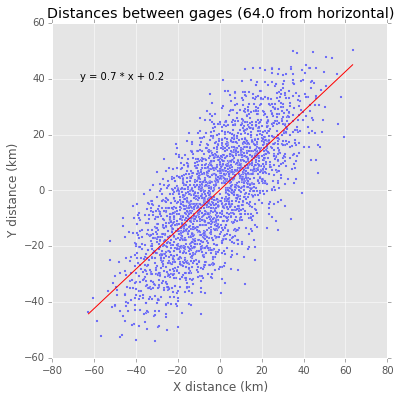

In [4]:
rg.plot_ll()

### A particular storm

This operates similarly to the wettest section, but for these semi variograms we are interested in tracking a timespan, such as one particular storm. To this end, we allow times in which some gages record zeros. Again, we pull out the times of interest and store them in a **`pandas.DataFrame`** object called **`RainGage.storm`**. This dataframe is the transpose of earlier dataframes and includes both euclidian and latlon coordinates for each rain gage.  

In [5]:
rg.get_storm('2011-06-26',time_step='1H')

Since the number of gages for each time is not consistant, we need to calculate the number of interdistances (np) to make sure that we have about 30 in each bin. So we calculate the semivariogram for each site separately and then aggregate the results

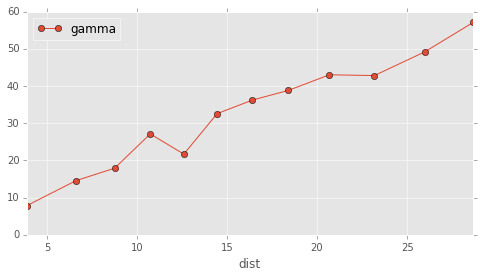

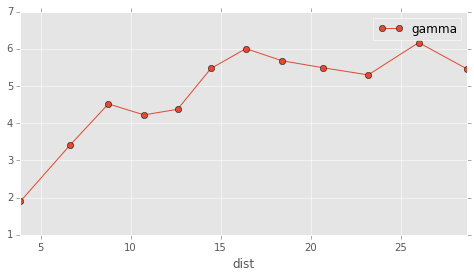

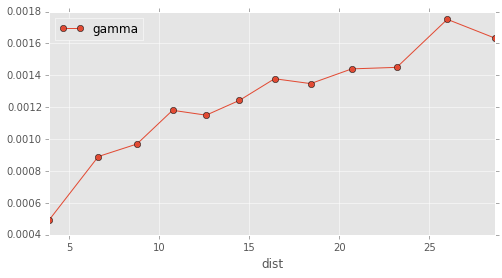

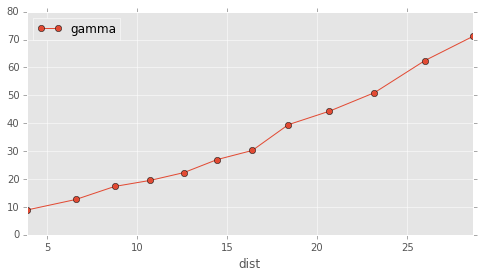

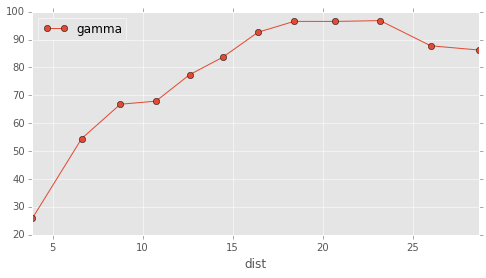

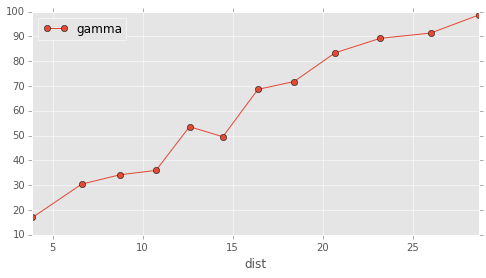

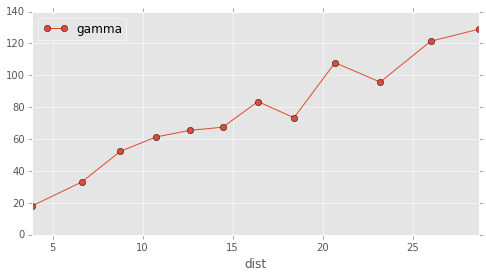

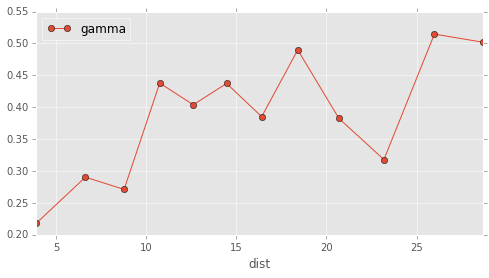

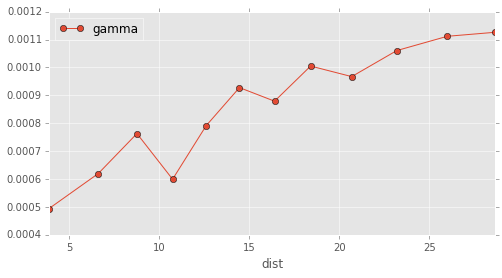

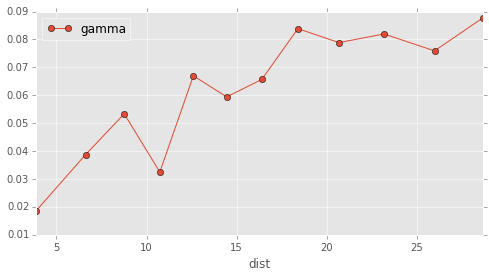

In [193]:
SVG = get_SVG(rad.storm, target_np=300, max_bnd=30)

We have access to the raw results by looking inside the **`panel`** called **`SVG_storm`**. This contains all of the variograms with the times at which they occur as the items. These items are **`pandas.Timestamp`** objects, so we can call flexibly as shown below.

In [194]:
SVG_storm[0,:,:].head()

,np,dist,gamma,dir.hor,dir.ver,id
0,300,3.88296,0.295924,0,0,var1
1,300,6.61709,0.303317,0,0,var1
2,300,8.76188,0.349951,0,0,var1
3,300,10.7403,0.441676,0,0,var1
4,300,12.6036,0.450481,0,0,var1


In [195]:
SVG_combined = combine_SVGs(SVG)

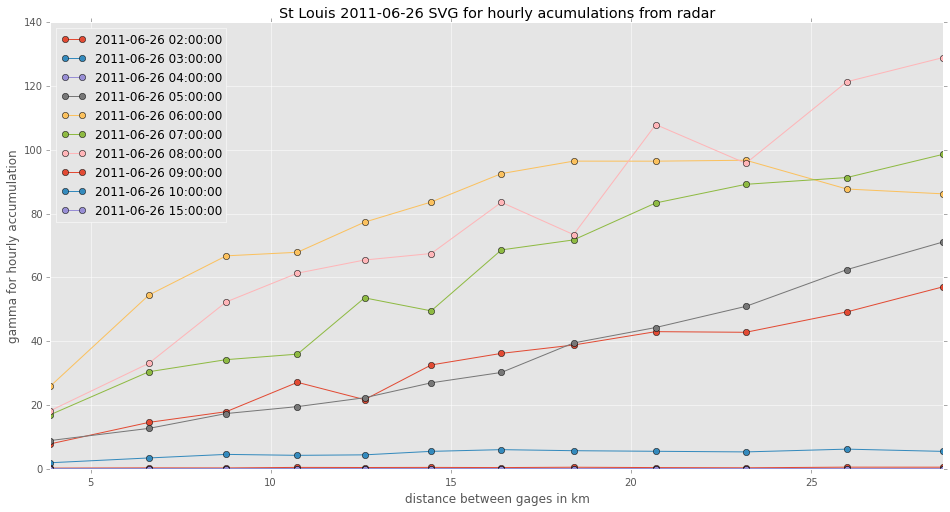

In [196]:
title = 'St Louis 2011-06-26 SVG for hourly acumulations from radar'

SVG_combined.plot(marker = 'o', figsize=(16,8))
plt.ylabel('gamma for hourly accumulation')
plt.xlabel('distance between gages in km')
plt.title(title)
plt.savefig(rg.save_path+'{title}.jpg'.format(title=title))
plt.show()

### Rainiest Days

This is an attempt to look at the rainiest days using a similar method to that described above. The first step is to select the days.  A straightforward approach is to compute the mean daily rainfall (with a day defined from 12 UTC to 12 UTC to reflect the diurnal cycle of rainfall, especially for the warm season) as the average of all rain gage observations for stations that are active and just rank the days.

In [148]:
p.get_rainiest(5)

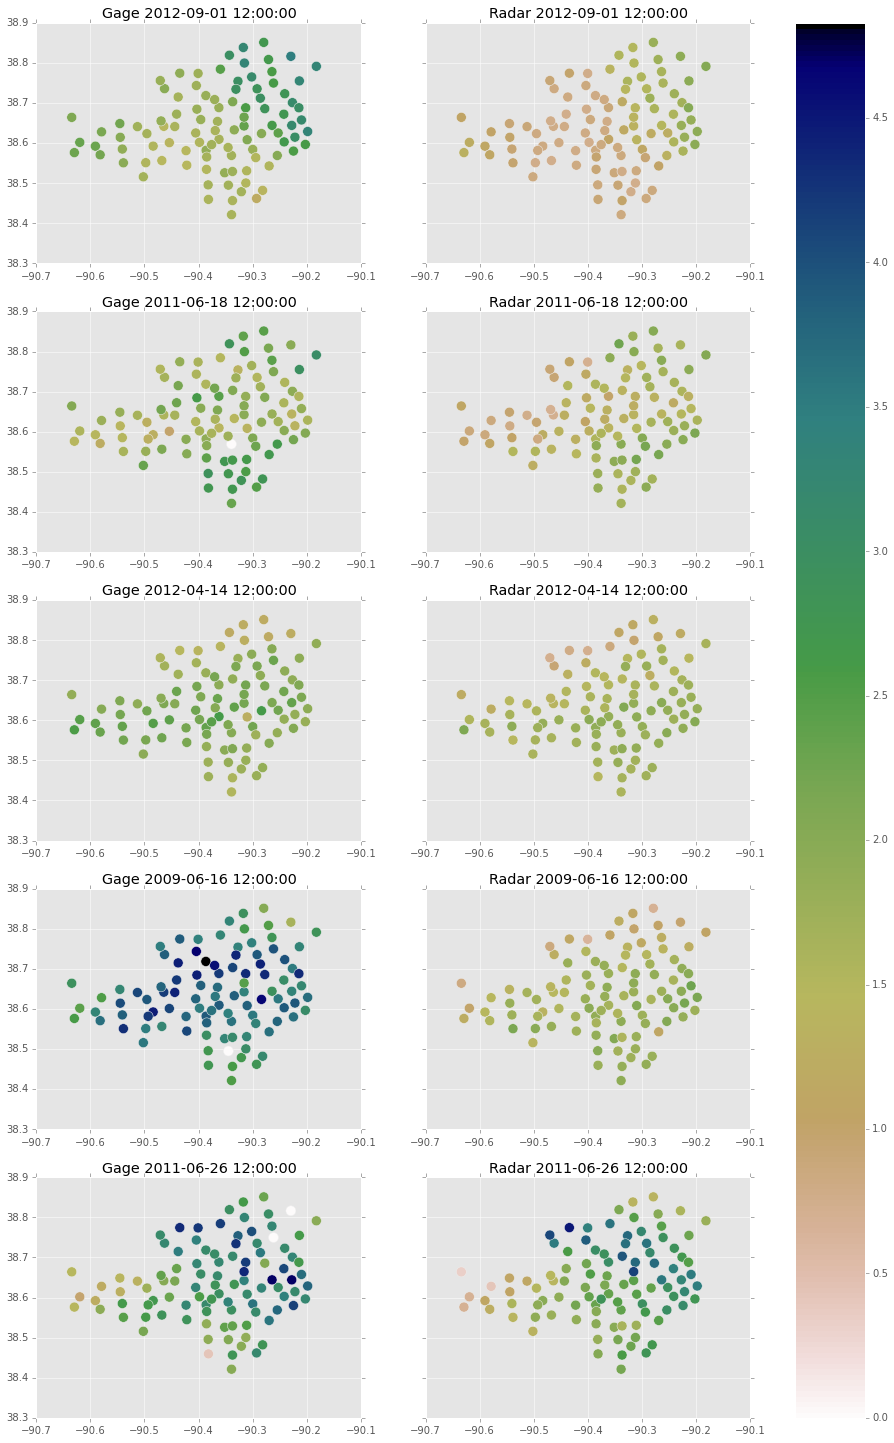

In [150]:
map_rain(p.rainiest, sharec=True, hide_title=True)

Now we can make a semi variogram of the rainiest days

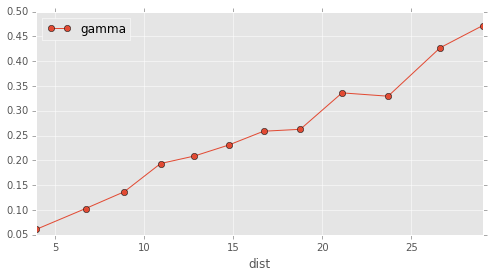

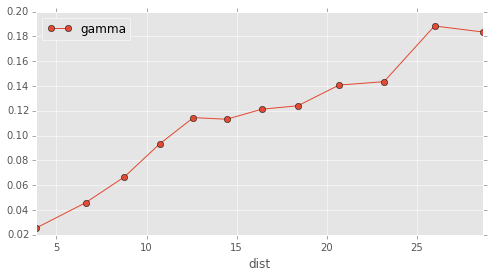

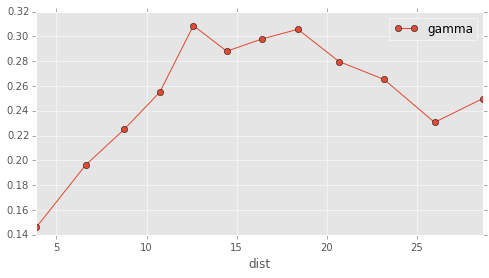

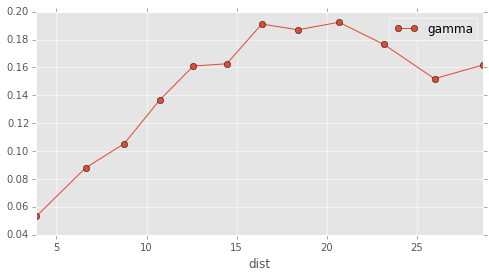

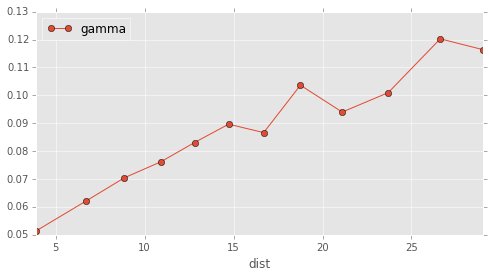

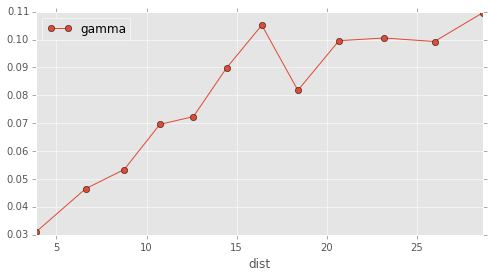

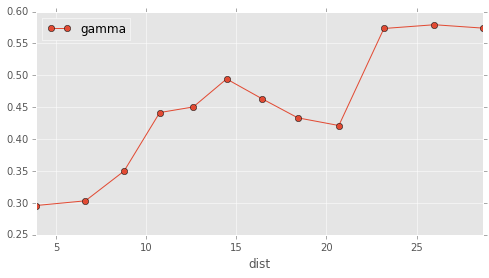

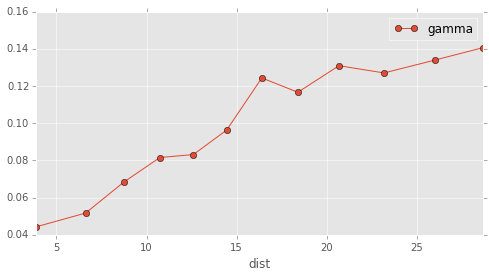

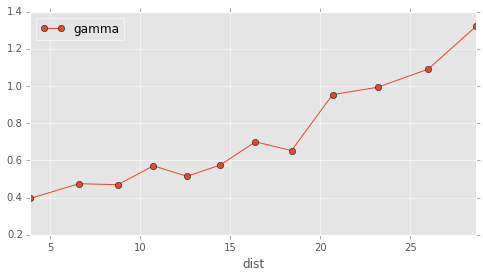

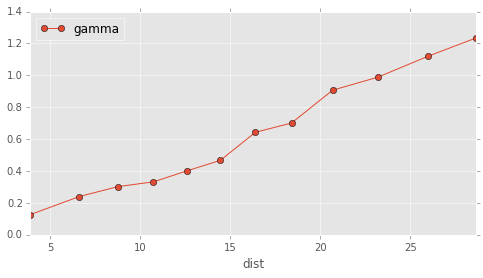

In [191]:
SVG = get_SVG(p.rainiest, target_np=300, max_bnd=30)
SVG_combined = combine_SVGs(SVG)

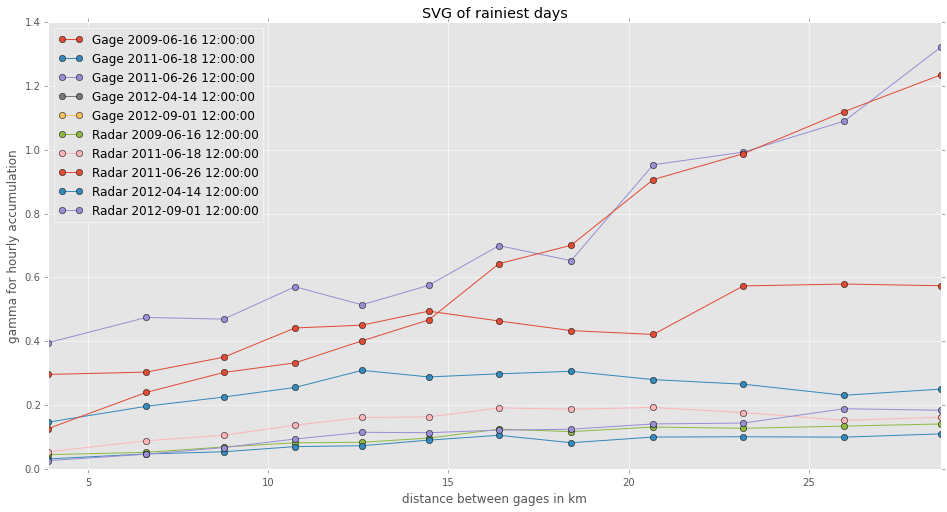

In [192]:
title = 'SVG of rainiest days'

SVG_combined.plot(marker = 'o', figsize=(16,8))
plt.ylabel('gamma for hourly accumulation')
plt.xlabel('distance between gages in km')
plt.title(title)
plt.savefig(rg.save_path+'{title}.jpg'.format(title=title))
plt.show()